<div align='center'><font color='brown'><h2>Predicting fraud in auto insurance claims & pattern extraction</h2></font></div>

<div align='center'><font color='green'><h2>Data Preprocessing and Data Visualization</h2></font></div>

# <font color='purple'>**Description</font>

Predicting the “Fraud in auto insurance claims” is a problem of identifying fraudulent claims in the auto insurance industry. This problem is critical for insurance companies to prevent fraudulent claims, which can result in significant financial losses. The fraudulent claims can be related to staged accidents, fictitious accidents, or exaggeration of actual damages.

To solve this problem, a machine learning model can be trained on historical auto insurance claims data, which includes both fraudulent and legitimate claims. The model can learn patterns and relationships in the data that distinguish between fraudulent and legitimate claims. Once trained, the model can be used to predict the likelihood of fraud for new claims.

This problem is a pattern extraction and classification problem because it involves identifying patterns in the data that are indicative of fraud and using these patterns to classify claims as fraudulent or legitimate. The patterns may include features such as the type of accident, the severity of damages, the location of the accident, and the demographics of the claimant. The machine learning model can learn these patterns through feature engineering, which involves selecting and transforming relevant features in the data, and through model training, which involves optimizing the model parameters to maximize its predictive accuracy.

# <font color='purple'>**Problem Statement</font>

The challenge is to use this information to build a predictive model that can accurately predict the "Fraud in auto insurance claims" and "pattern extraction" based on their characteristics.

# <font color='purple'>**Importing necessary libraries</font>

In [1]:
#importing required and necessary libraries
import numpy as np # used to perform mathematical operation on array
import pandas as pd # used for data manipulation
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

C:\Users\neeli\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1) "numpy" provides tools for working with arrays and matrices, as well as a variety of mathematical functions.
2) "pandas" provides data structures and functions for working with structured data, including tables and time series.
3) "matplotlib" provides a range of tools for creating visualizations of data, including line plots, scatter plots, histograms, and bar charts.
4) "seaborn" is built on top of matplotlib and provides a higher-level interface for creating attractive and informative visualizations of complex datasets. It includes a range of functions for creating visualizations such as heatmaps, pair plots.
5) "%matplotlib inline" sets the backend of matplotlib to the 'inline' backend, which allows plots to be displayed within the notebook itself.
6) imports the warnings module and sets the warning filter to ignore all warning messages that may be issued by Python or other modules during program execution.
7) sets the maximum number of rows and columns to display in a pandas DataFrame to None, which means that all columns will be displayed.

# <font color='purple'>**Reading the dataset</font>

In [2]:
train_demographics = pd.read_csv("Train_Demographics.csv",na_values=['NA'])
train_policy = pd.read_csv("Train_Policy.csv",na_values=['NA', '-1', 'MISSINGVAL'])
train_claim = pd.read_csv("Train_Claim.csv",na_values=['?', '-5', 'MISSINGVALUE', 'MISSEDDATA'])
train_vehicle = pd.read_csv("Train_Vehicle.csv",na_values=['???'])
train = pd.read_csv("Traindata_with_Target.csv")

In [3]:
test_demographics = pd.read_csv('Test_Demographics.csv',na_values=['NA'])
test_claim = pd.read_csv('Test_Claim.csv',na_values=['?', '-5', 'MISSINGVALUE', 'MISSEDDATA'])
test_policy = pd.read_csv('Test_Policy.csv',na_values=['NA', '-1', 'MISSINGVAL'])
test_vehicle = pd.read_csv('Test_Vehicle.csv',na_values=['???'])
test = pd.read_csv("Test.csv")

The "pd.read_csv()" function reads a comma-separated values (CSV) file and returns a DataFrame object. Here, the file path for all the CSV files is passed as an argument to the function.By reading in the data using pd.read_csv(), the dataset is converted into a pandas DataFrame object.Once the data has been read into a DataFrame object, it can be further explored and analyzed using a variety of pandas and other Python data analysis libraries.

## <font color='purple'>**Exploratory Data Analysis and Data preprocessing</font>

# *Demographics 

# Demographics Train Data

In [4]:
train_demographics.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


Inference: 
1) This method displays the first 5 rows of the Titanic dataset, providing a glimpse of the structure of the dataset and the types of information it contains. Each row represents CustomerID, and the columns provide information about each Customer, such as their InsuredAge, InsuredGender and so on.
2) The head() method is useful for quickly inspecting the dataset and understanding its structure.

In [5]:
train_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   InsuredAge             28836 non-null  int64 
 2   InsuredZipCode         28836 non-null  int64 
 3   InsuredGender          28806 non-null  object
 4   InsuredEducationLevel  28836 non-null  object
 5   InsuredOccupation      28836 non-null  object
 6   InsuredHobbies         28836 non-null  object
 7   CapitalGains           28836 non-null  int64 
 8   CapitalLoss            28836 non-null  int64 
 9   Country                28834 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


Inference: 
1) The demographics train data contains 28836 rows (instances) and 10 columns (features).
2) Each feature is labeled with a column name
3) For each feature, the output displays the non-null count and the data type of the feature.
4) The output also displays the memory usage of the dataset.
5) we can see that the dataset contains both numerical and categorical features, as well as missing values in 2 features -"InsuredGender", "Country")

In [6]:
train_demographics.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss
count,28836.000000,28836.000000,28836.000000,28836.000000
mean,38.815370,502436.579068,23066.569566,-24940.612429
std,7.996377,72250.868871,27637.813724,27913.209608
min,19.000000,430104.000000,0.000000,-111100.000000
25%,33.000000,448603.000000,0.000000,-50000.000000
50%,38.000000,466691.000000,0.000000,0.000000
75%,44.000000,603848.000000,49000.000000,0.000000
max,64.000000,620962.000000,100500.000000,0.000000


Inference: The table shows the summary statistics of the numerical columns in the demographics train data.
1) The "count" row indicates the number of non-null values for each column.
2) The "mean" row shows the mean or average value for each column.
3) The "std" row shows the standard deviation of each column.
4) The "min" row shows the minimum value in each column.
5) The "25%, 50%, and 75%" rows show the values at the corresponding percentiles, which divide the data into quarters.
6) The "max" row shows the maximum value in each column.
7) We can see that the mean InsuredAge was 38.81 years.

In [7]:
train_demographics.columns

Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country'],
      dtype='object')

In [8]:
train_demographics.shape

(28836, 10)

Inference: The "train_demographics.shape" command returns the dimensions of the DataFrame. Here, the dataset has 28836 rows (instances) and 10 columns (features).

In [9]:
train_demographics.isnull().sum()

CustomerID                0
InsuredAge                0
InsuredZipCode            0
InsuredGender            30
InsuredEducationLevel     0
InsuredOccupation         0
InsuredHobbies            0
CapitalGains              0
CapitalLoss               0
Country                   2
dtype: int64

Inference:
1. Above code gives information which tells us whether if there are any missing values.
2. From the output, we can observe that there are 30 missing values in "InsuredGender" and 2 in "Country.

In [10]:
print(train_demographics['InsuredGender'].value_counts())
print(train_demographics['Country'].value_counts())

FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64
India    28834
Name: Country, dtype: int64


Inference:

1. The first set of lines shows the value counts for the InsuredGender column. There are 15,644 rows with the value FEMALE and 13,162 rows with the value MALE. The dtype is int64, which indicates that the values are stored as integers.
2. The second set of lines shows the value counts for the Country column. There are 28,834 rows with the value India. The dtype is also int64.

In [11]:
train_demographics[['InsuredGender','Country']] = train_demographics[['InsuredGender','Country']].fillna(train_demographics.mode().iloc[0])
print(train_demographics.isnull().sum())

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
dtype: int64


Inference:
 
1. Using the above code it fills any missing values in the InsuredGender and Country columns of the train_demographics DataFrame with the mode (most frequent value) of each column.

# Demographics Test Data

In [12]:
test_demographics.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India


In [13]:
test_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             8912 non-null   object
 1   InsuredAge             8912 non-null   int64 
 2   InsuredZipCode         8912 non-null   int64 
 3   InsuredGender          8904 non-null   object
 4   InsuredEducationLevel  8912 non-null   object
 5   InsuredOccupation      8912 non-null   object
 6   InsuredHobbies         8912 non-null   object
 7   CapitalGains           8912 non-null   int64 
 8   CapitalLoss            8912 non-null   int64 
 9   Country                8908 non-null   object
dtypes: int64(4), object(6)
memory usage: 696.4+ KB


In [14]:
test_demographics.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss
count,8912.000000,8912.000000,8912.000000,8912.000000
mean,38.743492,501558.312949,23413.004937,-25365.888689
std,7.914619,72051.904910,27821.325212,28032.959284
min,19.000000,430104.000000,0.000000,-111100.000000
25%,33.000000,447469.000000,0.000000,-50400.000000
50%,38.000000,466303.000000,0.000000,0.000000
75%,44.000000,603527.000000,49900.000000,0.000000
max,64.000000,620962.000000,100500.000000,0.000000


In [15]:
test_demographics.columns

Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country'],
      dtype='object')

In [16]:
test_demographics.shape

(8912, 10)

In [17]:
test_demographics.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            8
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  4
dtype: int64

In [18]:
test_demographics[['InsuredGender','Country']] = test_demographics[['InsuredGender','Country']].fillna(test_demographics.mode().iloc[0])
test_demographics.isnull().sum()

CustomerID               0
InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
dtype: int64

# *Policy

# Policy Train Data

In [19]:
train_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [20]:
# Convert the DateOfPolicyCoverage column to datetime format
train_policy['DateOfPolicyCoverage'] = pd.to_datetime(train_policy['DateOfPolicyCoverage'])

# Extract year, month, and day as separate columns
train_policy['Year'] = train_policy['DateOfPolicyCoverage'].dt.year
train_policy['Month'] = train_policy['DateOfPolicyCoverage'].dt.month
train_policy['Day'] = train_policy['DateOfPolicyCoverage'].dt.day
train_policy.drop('DateOfPolicyCoverage', axis=1, inplace=True)

In [21]:
# rename attributes
train_policy = train_policy.rename(columns={"Year": "YearOfPolicyCoverage", "Month": "MonthOfPolicyCoverage", "Day": "DayOfPolicyCoverage"})

In [22]:
train_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage
0,110122,328,State3,250/500,1000,1406.91,0,husband,Cust1001,2014,10,17
1,110125,256,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004,1990,5,25
2,110126,228,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005,2014,6,6
3,110127,256,State3,250/500,1000,1351.10,0,unmarried,Cust1006,2006,10,12
4,110128,137,State2,250/500,1000,1333.35,0,husband,Cust1007,2000,6,4


In [23]:
train_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   InsurancePolicyState        28836 non-null  object 
 3   Policy_CombinedSingleLimit  28836 non-null  object 
 4   Policy_Deductible           28836 non-null  int64  
 5   PolicyAnnualPremium         28695 non-null  float64
 6   UmbrellaLimit               28836 non-null  int64  
 7   InsuredRelationship         28836 non-null  object 
 8   CustomerID                  28836 non-null  object 
 9   YearOfPolicyCoverage        28836 non-null  int64  
 10  MonthOfPolicyCoverage       28836 non-null  int64  
 11  DayOfPolicyCoverage         28836 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.6+ MB


In [24]:
train_policy.describe()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage
count,28836.000000,28836.000000,28836.000000,28695.000000,2.883600e+04,28836.000000,28836.000000,28836.000000
mean,129312.517097,203.067867,1114.282529,1261.702646,9.836680e+05,2001.505063,6.557602,15.447982
std,11114.060267,99.932951,546.632816,205.385158,1.969282e+06,6.564636,3.137104,7.690441
min,110122.000000,1.000000,500.000000,436.280000,-1.000000e+06,1990.000000,1.000000,1.000000
25%,119698.750000,126.000000,622.000000,1124.425000,0.000000e+00,1996.000000,4.000000,9.000000
50%,129278.500000,199.000000,1000.000000,1266.440000,0.000000e+00,2001.000000,7.000000,16.000000
75%,138933.250000,267.000000,1627.000000,1397.200000,4.859610e+05,2007.000000,9.000000,22.000000
max,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,2015.000000,12.000000,31.000000


In [25]:
train_policy.columns

Index(['InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'InsuredRelationship', 'CustomerID', 'YearOfPolicyCoverage',
       'MonthOfPolicyCoverage', 'DayOfPolicyCoverage'],
      dtype='object')

In [26]:
train_policy.shape

(28836, 12)

In [27]:
train_policy.isnull().sum()

InsurancePolicyNumber           0
CustomerLoyaltyPeriod           0
InsurancePolicyState            0
Policy_CombinedSingleLimit      0
Policy_Deductible               0
PolicyAnnualPremium           141
UmbrellaLimit                   0
InsuredRelationship             0
CustomerID                      0
YearOfPolicyCoverage            0
MonthOfPolicyCoverage           0
DayOfPolicyCoverage             0
dtype: int64

In [28]:
print(train_policy['PolicyAnnualPremium'].value_counts())

1310.77    7
1310.78    6
1226.29    5
1285.77    5
1265.59    5
1168.02    5
1278.14    5
1298.80    5
1326.98    5
1315.68    5
1334.47    5
1330.09    4
1484.15    4
1281.50    4
1236.68    4
1458.40    4
1364.64    4
1082.61    4
1310.80    4
1346.50    4
1153.35    4
1534.83    4
1198.44    4
1304.09    4
1238.35    4
1193.40    4
1098.04    4
1294.67    4
1250.38    4
1309.88    4
1204.91    4
1099.43    4
1390.85    4
1437.94    4
1281.25    4
1160.19    4
1362.63    4
1124.61    4
1147.22    4
1283.82    4
1275.40    4
1251.57    4
1022.42    4
1384.37    4
1198.92    4
1310.79    4
1457.05    4
1315.50    4
1205.95    4
1450.33    4
1305.23    4
1303.97    4
1271.31    4
1297.27    4
1223.24    4
1301.46    4
1221.00    4
1329.01    4
1133.23    4
1395.62    4
1129.57    4
1364.97    4
1404.96    4
1228.04    4
1151.19    4
1156.33    4
1381.27    4
1250.23    4
1263.45    4
1355.64    4
1134.23    3
1242.41    3
1123.82    3
1238.13    3
1247.19    3
1281.86    3
1464.09    3

In [29]:
train_policy['PolicyAnnualPremium'].fillna(train_policy['PolicyAnnualPremium'].median(), inplace=True)
print(train_policy.isnull().sum())

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
YearOfPolicyCoverage          0
MonthOfPolicyCoverage         0
DayOfPolicyCoverage           0
dtype: int64


# Policy Test Data

In [30]:
test_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020


In [31]:
# Convert the DateOfPolicyCoverage column to datetime format
test_policy['DateOfPolicyCoverage'] = pd.to_datetime(test_policy['DateOfPolicyCoverage'])

# Extract year, month, and day as separate columns
test_policy['Year'] = test_policy['DateOfPolicyCoverage'].dt.year
test_policy['Month'] = test_policy['DateOfPolicyCoverage'].dt.month
test_policy['Day'] = test_policy['DateOfPolicyCoverage'].dt.day
test_policy.drop('DateOfPolicyCoverage', axis=1, inplace=True)

In [32]:
# rename attributes
test_policy = test_policy.rename(columns={"Year": "YearOfPolicyCoverage", "Month": "MonthOfPolicyCoverage", "Day": "DayOfPolicyCoverage"})

In [33]:
test_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage
0,110124,134,State3,100/300,2000,1413.14,5000000,own-child,Cust1003,2000,9,6
1,110129,165,State1,100/300,1000,1137.03,0,unmarried,Cust1008,1990,2,3
2,110137,473,State2,100/300,2000,1131.40,0,other-relative,Cust1016,1992,10,19
3,110140,160,State3,500/1000,500,1374.22,0,other-relative,Cust1019,2014,12,28
4,110141,196,State2,500/1000,2000,1475.73,0,own-child,Cust1020,1992,8,2


In [34]:
test_policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       8912 non-null   int64  
 1   CustomerLoyaltyPeriod       8912 non-null   int64  
 2   InsurancePolicyState        8912 non-null   object 
 3   Policy_CombinedSingleLimit  8912 non-null   object 
 4   Policy_Deductible           8912 non-null   int64  
 5   PolicyAnnualPremium         8865 non-null   float64
 6   UmbrellaLimit               8912 non-null   int64  
 7   InsuredRelationship         8912 non-null   object 
 8   CustomerID                  8912 non-null   object 
 9   YearOfPolicyCoverage        8912 non-null   int64  
 10  MonthOfPolicyCoverage       8912 non-null   int64  
 11  DayOfPolicyCoverage         8912 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 835.6+ KB


In [35]:
test_policy.describe()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage
count,8912.000000,8912.000000,8912.000000,8865.000000,8.912000e+03,8912.000000,8912.000000,8912.000000
mean,130481.939295,203.055206,1123.580790,1260.235059,9.318594e+05,2001.441764,6.656979,15.289497
std,10879.022180,98.423250,553.139684,205.534081,1.919603e+06,6.595158,3.142099,7.677172
min,110124.000000,0.000000,500.000000,433.330000,-8.836920e+05,1990.000000,1.000000,1.000000
25%,121312.500000,127.000000,622.000000,1119.460000,0.000000e+00,1996.000000,4.000000,9.000000
50%,130807.000000,199.000000,1000.000000,1265.840000,0.000000e+00,2001.000000,7.000000,15.000000
75%,139904.000000,265.000000,1691.250000,1399.240000,2.836810e+05,2007.000000,9.000000,21.000000
max,148617.000000,478.000000,2000.000000,2033.540000,9.699227e+06,2015.000000,12.000000,31.000000


In [36]:
test_policy.columns

Index(['InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'InsuredRelationship', 'CustomerID', 'YearOfPolicyCoverage',
       'MonthOfPolicyCoverage', 'DayOfPolicyCoverage'],
      dtype='object')

In [37]:
test_policy.shape

(8912, 12)

In [38]:
test_policy.isnull().sum()

InsurancePolicyNumber          0
CustomerLoyaltyPeriod          0
InsurancePolicyState           0
Policy_CombinedSingleLimit     0
Policy_Deductible              0
PolicyAnnualPremium           47
UmbrellaLimit                  0
InsuredRelationship            0
CustomerID                     0
YearOfPolicyCoverage           0
MonthOfPolicyCoverage          0
DayOfPolicyCoverage            0
dtype: int64

In [39]:
test_policy['PolicyAnnualPremium'].fillna(test_policy['PolicyAnnualPremium'].median(), inplace=True)
print(test_policy.isnull().sum())

InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
CustomerID                    0
YearOfPolicyCoverage          0
MonthOfPolicyCoverage         0
DayOfPolicyCoverage           0
dtype: int64


# *Claim

# Claim Train Data 

In [40]:
train_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481


In [41]:
# Convert the DateOfPolicyCoverage column to datetime format
train_claim['DateOfIncident'] = pd.to_datetime(train_claim['DateOfIncident'])

# Extract year, month, and day as separate columns
train_claim['Year'] = train_claim['DateOfIncident'].dt.year
train_claim['Month'] = train_claim['DateOfIncident'].dt.month
train_claim['Day'] = train_claim['DateOfIncident'].dt.day
train_claim.drop('DateOfIncident', axis=1, inplace=True)

In [42]:
# rename attributes
train_claim = train_claim.rename(columns={"Year": "YearOfIncident", "Month": "MonthOfIncident", "Day": "DayOfIncident"})

In [43]:
train_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage
0,110122,328,State3,250/500,1000,1406.91,0,husband,Cust1001,2014,10,17
1,110125,256,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004,1990,5,25
2,110126,228,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005,2014,6,6
3,110127,256,State3,250/500,1000,1351.10,0,unmarried,Cust1006,2006,10,12
4,110128,137,State2,250/500,1000,1333.35,0,husband,Cust1007,2000,6,4


In [44]:
train_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             28836 non-null  object 
 1   TypeOfIncident         28836 non-null  object 
 2   TypeOfCollission       23674 non-null  object 
 3   SeverityOfIncident     28836 non-null  object 
 4   AuthoritiesContacted   28836 non-null  object 
 5   IncidentState          28836 non-null  object 
 6   IncidentCity           28836 non-null  object 
 7   IncidentAddress        28836 non-null  object 
 8   IncidentTime           28805 non-null  float64
 9   NumberOfVehicles       28836 non-null  int64  
 10  PropertyDamage         18377 non-null  object 
 11  BodilyInjuries         28836 non-null  int64  
 12  Witnesses              28790 non-null  float64
 13  PoliceReport           19031 non-null  object 
 14  AmountOfTotalClaim     28786 non-null  float64
 15  Am

In [45]:
train_claim.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident
count,28805.000000,28836.000000,28836.000000,28790.00000,28786.000000,28836.000000,28836.000000,28836.000000,28836.0,28836.000000,28836.000000
mean,11.764069,1.823207,0.985782,1.48826,52308.545473,7337.118428,7283.870197,37687.129387,2015.0,1.495110,15.010300
std,6.148869,0.980099,0.784764,1.04079,25101.172550,4427.638593,4375.842738,17977.048232,0.0,0.516162,7.603878
min,0.000000,1.000000,0.000000,0.00000,150.000000,0.000000,0.000000,109.000000,2015.0,1.000000,1.000000
25%,6.000000,1.000000,0.000000,1.00000,44643.750000,4743.750000,4862.000000,32193.250000,2015.0,1.000000,9.000000
50%,12.000000,1.000000,1.000000,1.00000,58360.000000,7147.000000,7051.000000,42457.500000,2015.0,1.000000,15.000000
75%,17.000000,3.000000,2.000000,2.00000,68982.750000,10571.250000,10327.000000,49535.750000,2015.0,2.000000,21.000000
max,23.000000,4.000000,2.000000,3.00000,114920.000000,21450.000000,23670.000000,79560.000000,2015.0,3.000000,31.000000


In [46]:
train_claim.columns

Index(['CustomerID', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'YearOfIncident', 'MonthOfIncident',
       'DayOfIncident'],
      dtype='object')

In [47]:
train_claim.shape

(28836, 21)

In [48]:
train_claim.isnull().sum()

CustomerID                   0
TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentState                0
IncidentCity                 0
IncidentAddress              0
IncidentTime                31
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                   46
PoliceReport              9805
AmountOfTotalClaim          50
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
YearOfIncident               0
MonthOfIncident              0
DayOfIncident                0
dtype: int64

In [49]:
for col in ['TypeOfCollission', 'IncidentTime', 'PropertyDamage', 'Witnesses', 'PoliceReport']:
    print(train_claim[col].value_counts())


Rear Collision     8561
Side Collision     7867
Front Collision    7246
Name: TypeOfCollission, dtype: int64
16.0    1616
17.0    1615
6.0     1564
15.0    1541
14.0    1461
5.0     1434
13.0    1420
18.0    1419
4.0     1406
12.0    1363
7.0     1331
11.0    1286
19.0    1280
8.0     1251
3.0     1232
9.0     1210
10.0    1165
20.0    1153
21.0     971
22.0     809
2.0      713
1.0      648
23.0     526
0.0      391
Name: IncidentTime, dtype: int64
NO     9687
YES    8690
Name: PropertyDamage, dtype: int64
2.0    8449
1.0    8345
0.0    6128
3.0    5868
Name: Witnesses, dtype: int64
NO     9898
YES    9133
Name: PoliceReport, dtype: int64


In [50]:
train_claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']] = train_claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']].fillna(train_claim.mode().iloc[0])
train_claim[['AmountOfTotalClaim', 'IncidentTime','Witnesses']] = train_claim[['AmountOfTotalClaim', 'IncidentTime','Witnesses']].fillna(train_claim.median())
train_claim.isnull().sum()

CustomerID               0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
YearOfIncident           0
MonthOfIncident          0
DayOfIncident            0
dtype: int64

# Claim Test Data 

In [51]:
test_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,3,NO,0,0.0,NaN,68354.0,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,1,NaN,1,1.0,NaN,55270.0,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,3,NO,0,1.0,NaN,59515.0,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,NaN,Trivial Damage,None,State7,City5,Location 1449,10.0,1,NaN,2,1.0,NaN,4941.0,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,3,NO,2,3.0,NO,34650.0,7700,3850,23100


In [52]:
# Convert the DateOfPolicyCoverage column to datetime format
test_claim['DateOfIncident'] = pd.to_datetime(test_claim['DateOfIncident'])

# Extract year, month, and day as separate columns
test_claim['Year'] = test_claim['DateOfIncident'].dt.year
test_claim['Month'] = test_claim['DateOfIncident'].dt.month
test_claim['Day'] = test_claim['DateOfIncident'].dt.day
test_claim.drop('DateOfIncident', axis=1, inplace=True)

In [53]:
# rename attributes
test_claim = test_claim.rename(columns={"Year": "YearOfIncident", "Month": "MonthOfIncident", "Day": "DayOfIncident"})

In [54]:
test_claim.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident
0,Cust10008,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,3,NO,0,0.0,NaN,68354.0,6835,8059,53460,2015,2,5
1,Cust10010,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,1,NaN,1,1.0,NaN,55270.0,8113,5240,41917,2015,1,13
2,Cust10015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,3,NO,0,1.0,NaN,59515.0,7490,9110,42915,2015,1,5
3,Cust10020,Vehicle Theft,NaN,Trivial Damage,None,State7,City5,Location 1449,10.0,1,NaN,2,1.0,NaN,4941.0,494,866,3581,2015,1,3
4,Cust1003,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,3,NO,2,3.0,NO,34650.0,7700,3850,23100,2015,2,22


In [55]:
test_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             8912 non-null   object 
 1   TypeOfIncident         8912 non-null   object 
 2   TypeOfCollission       7149 non-null   object 
 3   SeverityOfIncident     8912 non-null   object 
 4   AuthoritiesContacted   8912 non-null   object 
 5   IncidentState          8912 non-null   object 
 6   IncidentCity           8912 non-null   object 
 7   IncidentAddress        8912 non-null   object 
 8   IncidentTime           8905 non-null   float64
 9   NumberOfVehicles       8912 non-null   int64  
 10  PropertyDamage         5713 non-null   object 
 11  BodilyInjuries         8912 non-null   int64  
 12  Witnesses              8900 non-null   float64
 13  PoliceReport           5898 non-null   object 
 14  AmountOfTotalClaim     8904 non-null   float64
 15  Amou

In [56]:
test_claim.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident
count,8905.000000,8912.000000,8912.000000,8900.000000,8904.000000,8912.000000,8912.000000,8912.000000,8912.0,8912.000000,8912.000000
mean,11.785963,1.801616,0.988330,1.494157,51092.660827,7214.076750,7114.529286,36761.520646,2015.0,1.498541,15.183797
std,6.157104,0.972594,0.783827,1.046545,25653.520520,4447.763373,4367.824773,18381.523101,0.0,0.514189,7.605576
min,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,2015.0,1.000000,1.000000
25%,6.000000,1.000000,0.000000,1.000000,42288.250000,4409.000000,4508.250000,30215.750000,2015.0,1.000000,9.000000
50%,12.000000,1.000000,1.000000,1.000000,57770.500000,7133.500000,6988.500000,41913.000000,2015.0,1.000000,15.000000
75%,17.000000,3.000000,2.000000,2.000000,68518.250000,10378.500000,10184.500000,49222.000000,2015.0,2.000000,21.000000
max,23.000000,4.000000,2.000000,3.000000,112320.000000,20989.000000,23498.000000,77760.000000,2015.0,3.000000,31.000000


In [57]:
test_claim.columns

Index(['CustomerID', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'YearOfIncident', 'MonthOfIncident',
       'DayOfIncident'],
      dtype='object')

In [58]:
test_claim.shape

(8912, 21)

In [59]:
test_claim.isnull().sum()

CustomerID                  0
TypeOfIncident              0
TypeOfCollission         1763
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentState               0
IncidentCity                0
IncidentAddress             0
IncidentTime                7
NumberOfVehicles            0
PropertyDamage           3199
BodilyInjuries              0
Witnesses                  12
PoliceReport             3014
AmountOfTotalClaim          8
AmountOfInjuryClaim         0
AmountOfPropertyClaim       0
AmountOfVehicleDamage       0
YearOfIncident              0
MonthOfIncident             0
DayOfIncident               0
dtype: int64

In [60]:
for col in ['TypeOfCollission', 'IncidentTime', 'PropertyDamage', 'Witnesses', 'PoliceReport']:
    print(test_claim[col].value_counts())


Rear Collision     2602
Side Collision     2388
Front Collision    2159
Name: TypeOfCollission, dtype: int64
17.0    512
16.0    506
6.0     489
5.0     455
4.0     441
15.0    440
7.0     439
12.0    435
14.0    432
18.0    426
13.0    425
9.0     421
19.0    382
8.0     382
3.0     373
20.0    367
10.0    366
11.0    362
21.0    303
22.0    257
1.0     222
2.0     186
23.0    184
0.0     100
Name: IncidentTime, dtype: int64
NO     3039
YES    2674
Name: PropertyDamage, dtype: int64
1.0    2605
2.0    2534
0.0    1886
3.0    1875
Name: Witnesses, dtype: int64
NO     3055
YES    2843
Name: PoliceReport, dtype: int64


In [61]:
test_claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']] = test_claim[['TypeOfCollission', 'PoliceReport', 'PropertyDamage']].fillna(test_claim.mode().iloc[0])
test_claim[['AmountOfTotalClaim', 'IncidentTime','Witnesses']] = test_claim[['AmountOfTotalClaim', 'IncidentTime','Witnesses']].fillna(test_claim.median())
test_claim.isnull().sum()

CustomerID               0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
YearOfIncident           0
MonthOfIncident          0
DayOfIncident            0
dtype: int64

# *Vehicle

# Vehicle Train Data 

In [62]:
train_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [63]:
train_vehicle = train_vehicle.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')

In [64]:
train_vehicle.columns = train_vehicle.columns.droplevel(0) 
train_vehicle.columns.name = None               
train_vehicle = train_vehicle.reset_index()

In [65]:
train_vehicle.head()

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,Vehicle26917,Audi,A5,2008
1,Cust10001,Vehicle15893,Audi,A5,2006
2,Cust10002,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,Vehicle28633,Toyota,CRV,2010


In [66]:
train_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    28836 non-null  object
 1   VehicleID     28836 non-null  object
 2   VehicleMake   28786 non-null  object
 3   VehicleModel  28836 non-null  object
 4   VehicleYOM    28836 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [67]:
train_vehicle.describe()

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
count,28836,28836,28786,28836,28836
unique,28836,28836,14,39,21
top,Cust10000,Vehicle26917,Saab,RAM,2007
freq,1,1,2415,1344,1730


In [68]:
train_vehicle.columns

Index(['CustomerID', 'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'], dtype='object')

In [69]:
train_vehicle.shape

(28836, 5)

In [70]:
train_vehicle.isnull().sum()

CustomerID       0
VehicleID        0
VehicleMake     50
VehicleModel     0
VehicleYOM       0
dtype: int64

In [71]:
train_vehicle['VehicleMake'].value_counts()

Saab          2415
Suburu        2313
Nissan        2300
Dodge         2263
Chevrolet     2174
Ford          2158
Accura        2099
BMW           2073
Toyota        1981
Volkswagen    1960
Audi          1952
Jeep          1946
Mercedes      1659
Honda         1493
Name: VehicleMake, dtype: int64

In [72]:
train_vehicle[['VehicleMake']] = train_vehicle[['VehicleMake']].fillna(train_vehicle.mode().iloc[0])
print(train_vehicle.isnull().sum())

CustomerID      0
VehicleID       0
VehicleMake     0
VehicleModel    0
VehicleYOM      0
dtype: int64


# Vehicle Test Data 

In [73]:
test_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry


In [74]:
test_vehicle = test_vehicle.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')

In [75]:
test_vehicle.columns = test_vehicle.columns.droplevel(0) 
test_vehicle.columns.name = None               
test_vehicle = test_vehicle.reset_index()

In [76]:
test_vehicle.head()

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,Vehicle37114,Accura,TL,2009
4,Cust1003,Vehicle16771,Dodge,RAM,2007


In [77]:
test_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    8912 non-null   object
 1   VehicleID     8912 non-null   object
 2   VehicleMake   8904 non-null   object
 3   VehicleModel  8912 non-null   object
 4   VehicleYOM    8912 non-null   object
dtypes: object(5)
memory usage: 348.2+ KB


In [78]:
test_vehicle.describe()

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
count,8912,8912,8904,8912,8912
unique,8912,8912,14,38,21
top,Cust10008,Vehicle34362,Suburu,Wrangler,2010
freq,1,1,743,507,544


In [79]:
test_vehicle.columns

Index(['CustomerID', 'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'], dtype='object')

In [80]:
test_vehicle.shape

(8912, 5)

In [81]:
test_vehicle.isnull().sum()

CustomerID      0
VehicleID       0
VehicleMake     8
VehicleModel    0
VehicleYOM      0
dtype: int64

In [82]:
test_vehicle['VehicleMake'].value_counts()

Suburu        743
Nissan        741
Jeep          725
Chevrolet     718
Saab          714
Dodge         706
Volkswagen    627
Accura        626
Ford          612
BMW           595
Toyota        590
Audi          587
Mercedes      478
Honda         442
Name: VehicleMake, dtype: int64

In [83]:
test_vehicle[['VehicleMake']] = test_vehicle[['VehicleMake']].fillna(test_vehicle.mode().iloc[0])
print(test_vehicle.isnull().sum())

CustomerID      0
VehicleID       0
VehicleMake     0
VehicleModel    0
VehicleYOM      0
dtype: int64


# *Train

In [84]:
train.head()

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     28836 non-null  object
 1   ReportedFraud  28836 non-null  object
dtypes: object(2)
memory usage: 450.7+ KB


In [86]:
train.describe()

,CustomerID,ReportedFraud
count,28836,28836
unique,28836,2
top,Cust20065,N
freq,1,21051


In [87]:
train.columns

Index(['CustomerID', 'ReportedFraud'], dtype='object')

In [88]:
train.shape

(28836, 2)

In [89]:
train.isnull().sum()

CustomerID       0
ReportedFraud    0
dtype: int64

# *Test

In [90]:
test.head()

,CustomerID
0,Cust10008
1,Cust10010
2,Cust10015
3,Cust10020
4,Cust1003


In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  8912 non-null   object
dtypes: object(1)
memory usage: 69.8+ KB


In [92]:
test.describe()

,CustomerID
count,8912
unique,8912
top,Cust10008
freq,1


In [93]:
test.columns

Index(['CustomerID'], dtype='object')

In [94]:
test.shape

(8912, 1)

In [95]:
test.isnull().sum()

CustomerID    0
dtype: int64

# <font color='purple'>**Merging train data, EDA and Data preprocessing</font>

# *Merging

In [96]:
merged_train_df = pd.merge(train_demographics, train_policy, on='CustomerID')
merged_train_df = pd.merge(merged_train_df, train_claim, on='CustomerID')
merged_train_df = pd.merge(merged_train_df, train_vehicle, on='CustomerID')
train_data = pd.merge(merged_train_df, train, on='CustomerID')

Inference:

This merges all the train datasets on the column 'CustomerID', and stores the result train_df dataframe finally.

In [97]:
# Save the dataframe as a new CSV file
train_data.to_csv('data_train.csv', index=False)
train_data = pd.read_csv('data_train.csv')

In [98]:
CustomerID = train_data["CustomerID"] # store the "CustomerID" column in a separate variable
train_data.drop("CustomerID", axis=1, inplace=True) # drop the "CustomerID" column from the "test_df" DataFrame
train_data.to_csv('Train_df',index=False)
train_df = pd.read_csv('Train_df')

# *EDA

In [99]:
train_df.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,119121,49,State1,100/300,1000,1632.73,0,not-in-family,1998,10,25,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NO,1,0.0,NO,65501.0,13417,6071,46013,2015,2,3,Vehicle26917,Audi,A5,2008,N
1,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,119122,114,State1,100/300,1000,1255.19,0,not-in-family,2000,11,15,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903,2015,2,2,Vehicle15893,Audi,A5,2006,N
2,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,119123,167,State3,500/1000,617,1373.38,0,wife,2001,2,12,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495,2015,1,15,Vehicle5152,Volkswagen,Jetta,1999,N
3,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,119124,190,State2,500/1000,722,1337.60,0,own-child,2005,4,11,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237,2015,1,19,Vehicle37363,Volkswagen,Jetta,2003,N
4,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,119125,115,State2,100/300,500,1353.73,4279863,unmarried,1996,10,25,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481,2015,1,9,Vehicle28633,Toyota,CRV,2010,N


In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsuredAge                  28836 non-null  int64  
 1   InsuredZipCode              28836 non-null  int64  
 2   InsuredGender               28836 non-null  object 
 3   InsuredEducationLevel       28836 non-null  object 
 4   InsuredOccupation           28836 non-null  object 
 5   InsuredHobbies              28836 non-null  object 
 6   CapitalGains                28836 non-null  int64  
 7   CapitalLoss                 28836 non-null  int64  
 8   Country                     28836 non-null  object 
 9   InsurancePolicyNumber       28836 non-null  int64  
 10  CustomerLoyaltyPeriod       28836 non-null  int64  
 11  InsurancePolicyState        28836 non-null  object 
 12  Policy_CombinedSingleLimit  28836 non-null  object 
 13  Policy_Deductible           288

Inference: 
1) The train data contains 28836 rows (instances) and 46 columns (features).
2) Each feature is labeled with a column name
3) For each feature, the output displays the non-null count and the data type of the feature.
4) The output also displays the memory usage of the dataset.
5) we can see that the dataset do not contain any null values.

In [101]:
train_df.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident,VehicleYOM
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.0,28836.000000,28836.000000,28836.000000
mean,38.815370,502436.579068,23066.569566,-24940.612429,129312.517097,203.067867,1114.282529,1261.725810,9.836680e+05,2001.505063,6.557602,15.447982,11.764322,1.823207,0.985782,1.487481,52319.038355,7337.118428,7283.870197,37687.129387,2015.0,1.495110,15.010300,2005.093113
std,7.996377,72250.868871,27637.813724,27913.209608,11114.060267,99.932951,546.632816,204.882653,1.969282e+06,6.564636,3.137104,7.690441,6.145568,0.980099,0.784764,1.040142,25080.664083,4427.638593,4375.842738,17977.048232,0.0,0.516162,7.603878,5.309956
min,19.000000,430104.000000,0.000000,-111100.000000,110122.000000,1.000000,500.000000,436.280000,-1.000000e+06,1990.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,150.000000,0.000000,0.000000,109.000000,2015.0,1.000000,1.000000,1995.000000
25%,33.000000,448603.000000,0.000000,-50000.000000,119698.750000,126.000000,622.000000,1125.247500,0.000000e+00,1996.000000,4.000000,9.000000,6.000000,1.000000,0.000000,1.000000,44686.250000,4743.750000,4862.000000,32193.250000,2015.0,1.000000,9.000000,2001.000000
50%,38.000000,466691.000000,0.000000,0.000000,129278.500000,199.000000,1000.000000,1266.440000,0.000000e+00,2001.000000,7.000000,16.000000,12.000000,1.000000,1.000000,1.000000,58360.000000,7147.000000,7051.000000,42457.500000,2015.0,1.000000,15.000000,2005.000000
75%,44.000000,603848.000000,49000.000000,0.000000,138933.250000,267.000000,1627.000000,1396.605000,4.859610e+05,2007.000000,9.000000,22.000000,17.000000,3.000000,2.000000,2.000000,68961.750000,10571.250000,10327.000000,49535.750000,2015.0,2.000000,21.000000,2010.000000
max,64.000000,620962.000000,100500.000000,0.000000,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,2015.000000,12.000000,31.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.0,3.000000,31.000000,2015.000000


In [102]:
train_df.shape

(28836, 45)

# *Checking for Missing values

In [103]:
train_df.isnull().sum().sum()

0

# *Outlier detection and treatment

In [104]:
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
print("Numerical columns: ", numerical_cols)
print('\n')
print('*****************')
print('\n')
print("Categorical columns: ", categorical_cols)

Numerical columns:  ['InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss', 'InsurancePolicyNumber', 'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit', 'YearOfPolicyCoverage', 'MonthOfPolicyCoverage', 'DayOfPolicyCoverage', 'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'YearOfIncident', 'MonthOfIncident', 'DayOfIncident', 'VehicleYOM']


*****************


Categorical columns:  ['InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'Country', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'PoliceReport', 'VehicleID', 'VehicleMake', 'VehicleModel', 'ReportedFraud']


In [105]:
for col in numerical_cols:
    q1 = train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")


Number of outliers in InsuredAge: 176
Number of outliers in InsuredZipCode: 0
Number of outliers in CapitalGains: 0
Number of outliers in CapitalLoss: 0
Number of outliers in InsurancePolicyNumber: 0
Number of outliers in CustomerLoyaltyPeriod: 2
Number of outliers in Policy_Deductible: 0
Number of outliers in PolicyAnnualPremium: 306
Number of outliers in UmbrellaLimit: 6455
Number of outliers in YearOfPolicyCoverage: 0
Number of outliers in MonthOfPolicyCoverage: 0
Number of outliers in DayOfPolicyCoverage: 0
Number of outliers in IncidentTime: 0
Number of outliers in NumberOfVehicles: 0
Number of outliers in BodilyInjuries: 0
Number of outliers in Witnesses: 0
Number of outliers in AmountOfTotalClaim: 4967
Number of outliers in AmountOfInjuryClaim: 28
Number of outliers in AmountOfPropertyClaim: 156
Number of outliers in AmountOfVehicleDamage: 5009
Number of outliers in YearOfIncident: 0
Number of outliers in MonthOfIncident: 0
Number of outliers in DayOfIncident: 0
Number of outlie

In [106]:
# Remove outliers
for col in numerical_cols:
    q1 = train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    train_df_cleaned = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]

# Save cleaned data to a new CSV file
train_df_cleaned.to_csv('cleaned_data.csv', index=False)

df_train = pd.read_csv("cleaned_data.csv")

In [107]:
train_df.isnull().sum().sum()

0

# *Conversion of data types

In [108]:
#Type conversion using Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_train.select_dtypes(include='object').columns.tolist()
df_train[categorical_cols] = df_train[categorical_cols].astype(str)
encoder = LabelEncoder()
for col in categorical_cols:
    df_train[col] = encoder.fit_transform(df_train[col])

In [109]:
df_train.isnull().sum().sum()

0

In [110]:
df_train['ReportedFraud'].value_counts()

0    21051
1     7785
Name: ReportedFraud, dtype: int64

In [111]:
df_train.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,35,454776,1,3,1,12,56700,-48500,0,119121,49,0,1,1000,1632.73,0,1,1998,10,25,0,2,2,4,4,0,279,17.0,3,0,1,0.0,0,65501.0,13417,6071,46013,2015,2,3,13692,1,5,2008,0
1,36,454776,1,3,12,6,70600,-48500,0,119122,114,0,1,1000,1255.19,0,1,2000,11,15,0,2,2,4,4,4,279,10.0,3,1,2,1.0,1,61382.0,15560,5919,39903,2015,2,2,4572,1,5,2006,0
2,33,603260,1,3,1,14,66400,-63700,0,119123,167,2,6,617,1373.38,0,5,2001,2,12,2,2,1,3,5,5,980,22.0,1,1,2,3.0,0,66755.0,11630,11630,43495,2015,1,15,25249,13,20,1999,0
3,36,474848,1,3,1,14,47900,-73400,0,119124,190,1,6,722,1337.60,0,3,2005,4,11,2,2,1,3,6,5,980,22.0,1,1,2,3.0,0,66243.0,12003,12003,42237,2015,1,19,22267,13,20,2003,0
4,29,457942,0,2,3,7,0,-41500,0,119125,115,1,1,500,1353.73,4279863,4,1996,10,25,2,1,1,1,5,5,624,10.0,1,0,2,1.0,1,53544.0,8829,7234,37481,2015,1,9,15080,12,8,2010,0


In [112]:
df_train.shape

(28836, 45)

# <font color='purple'>**Merging test data, EDA and Data preprocessing</font>

# *Merging

In [113]:
merged_test_data = pd.merge(test_demographics, test_claim, on='CustomerID')
merged_test_data = pd.merge(merged_test_data, test_policy, on='CustomerID')
merged_test_data = pd.merge(merged_test_data, test_vehicle, on='CustomerID')
test_data = pd.merge(merged_test_data, test, on='CustomerID')

In [114]:
# Save the dataframe as a new CSV file
test_data.to_csv('data_test.csv', index=False)
test_data = pd.read_csv('data_test.csv')

In [115]:
CustomerIDs = test_data["CustomerID"] # store the "CustomerID" column in a separate variable
test_data.drop("CustomerID", axis=1, inplace=True) # drop the "CustomerID" column from the "test_df" DataFrame
test_data.to_csv("final_df_test.csv")
test_df=pd.read_csv("final_df_test.csv")

# *EDA

In [116]:
test_df.head()

,Unnamed: 0,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident,InsurancePolicyNumber,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,0,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,3,NO,0,0.0,NO,68354.0,6835,8059,53460,2015,2,5,119129,84,State2,500/1000,2000,1006.00,0,own-child,1998,5,10,Vehicle34362,Volkswagen,Passat,1995
1,1,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,1,NO,1,1.0,NO,55270.0,8113,5240,41917,2015,1,13,119131,232,State3,100/300,500,1279.17,0,unmarried,2011,11,10,Vehicle17046,Nissan,Ultima,2006
2,2,39,461919,MALE,JD,other-service,movies,30400,0,India,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,3,NO,0,1.0,NO,59515.0,7490,9110,42915,2015,1,5,119136,218,State2,250/500,1000,1454.67,1235986,other-relative,2010,7,17,Vehicle11038,Suburu,Impreza,2010
3,3,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,Vehicle Theft,Rear Collision,Trivial Damage,None,State7,City5,Location 1449,10.0,1,NO,2,1.0,NO,4941.0,494,866,3581,2015,1,3,119141,205,State3,500/500,2000,1287.76,5873212,wife,2000,9,10,Vehicle37114,Accura,TL,2009
4,4,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,3,NO,2,3.0,NO,34650.0,7700,3850,23100,2015,2,22,110124,134,State3,100/300,2000,1413.14,5000000,own-child,2000,9,6,Vehicle16771,Dodge,RAM,2007


In [117]:
test_df = test_df.drop("Unnamed: 0",axis=1)


In [118]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsuredAge                  8912 non-null   int64  
 1   InsuredZipCode              8912 non-null   int64  
 2   InsuredGender               8912 non-null   object 
 3   InsuredEducationLevel       8912 non-null   object 
 4   InsuredOccupation           8912 non-null   object 
 5   InsuredHobbies              8912 non-null   object 
 6   CapitalGains                8912 non-null   int64  
 7   CapitalLoss                 8912 non-null   int64  
 8   Country                     8912 non-null   object 
 9   TypeOfIncident              8912 non-null   object 
 10  TypeOfCollission            8912 non-null   object 
 11  SeverityOfIncident          8912 non-null   object 
 12  AuthoritiesContacted        8912 non-null   object 
 13  IncidentState               8912 

Inference: 
1) The train data contains 8912 rows (instances) and 45 columns (features).
2) Each feature is labeled with a column name
3) For each feature, the output displays the non-null count and the data type of the feature.
4) The output also displays the memory usage of the dataset.
5) we can see that the dataset do not contain any null values.

In [119]:
test_df.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,VehicleYOM
count,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.0,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8.912000e+03,8912.000000,8912.000000,8912.000000,8912.000000
mean,38.743492,501558.312949,23413.004937,-25365.888689,11.786131,1.801616,0.988330,1.493492,51098.655296,7214.076750,7114.529286,36761.520646,2015.0,1.498541,15.183797,130481.939295,203.055206,1123.580790,1260.264618,9.318594e+05,2001.441764,6.656979,15.289497,2005.099417
std,7.914619,72051.904910,27821.325212,28032.959284,6.154688,0.972594,0.783827,1.045998,25642.782427,4447.763373,4367.824773,18381.523101,0.0,0.514189,7.605576,10879.022180,98.423250,553.139684,204.991734,1.919603e+06,6.595158,3.142099,7.677172,5.312139
min,19.000000,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,2015.0,1.000000,1.000000,110124.000000,0.000000,500.000000,433.330000,-8.836920e+05,1990.000000,1.000000,1.000000,1995.000000
25%,33.000000,447469.000000,0.000000,-50400.000000,6.000000,1.000000,0.000000,1.000000,42303.000000,4409.000000,4508.250000,30215.750000,2015.0,1.000000,9.000000,121312.500000,127.000000,622.000000,1120.035000,0.000000e+00,1996.000000,4.000000,9.000000,2001.000000
50%,38.000000,466303.000000,0.000000,0.000000,12.000000,1.000000,1.000000,1.000000,57770.500000,7133.500000,6988.500000,41913.000000,2015.0,1.000000,15.000000,130807.000000,199.000000,1000.000000,1265.840000,0.000000e+00,2001.000000,7.000000,15.000000,2005.000000
75%,44.000000,603527.000000,49900.000000,0.000000,17.000000,3.000000,2.000000,2.000000,68506.250000,10378.500000,10184.500000,49222.000000,2015.0,2.000000,21.000000,139904.000000,265.000000,1691.250000,1398.722500,2.836810e+05,2007.000000,9.000000,21.000000,2010.000000
max,64.000000,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,112320.000000,20989.000000,23498.000000,77760.000000,2015.0,3.000000,31.000000,148617.000000,478.000000,2000.000000,2033.540000,9.699227e+06,2015.000000,12.000000,31.000000,2015.000000


In [120]:
test_df.shape

(8912, 44)

# *Checking for Missing values

In [121]:
test_df.isnull().sum().sum()

0

# *Conversion of data types

In [122]:
numerical_cols = test_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = test_df.select_dtypes(include='object').columns.tolist()
print("Numerical columns: ", numerical_cols)
print('\n')
print('*****************')
print('\n')
print("Categorical columns: ", categorical_cols)

Numerical columns:  ['InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss', 'IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'YearOfIncident', 'MonthOfIncident', 'DayOfIncident', 'InsurancePolicyNumber', 'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit', 'YearOfPolicyCoverage', 'MonthOfPolicyCoverage', 'DayOfPolicyCoverage', 'VehicleYOM']


*****************


Categorical columns:  ['InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'Country', 'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'PoliceReport', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleID', 'VehicleMake', 'VehicleModel']


In [123]:
test_df.dtypes

InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
Country                        object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
YearOfIncide

In [124]:
#Type conversion using Label Encoder

from sklearn.preprocessing import LabelEncoder
categorical_cols = test_df.select_dtypes(include='object').columns.tolist()
test_df[categorical_cols] = test_df[categorical_cols].astype(str)

encoder = LabelEncoder()
for col in categorical_cols:
    test_df[col] = encoder.fit_transform(test_df[col])

In [125]:
test_df.dtypes

InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                   int32
InsuredEducationLevel           int32
InsuredOccupation               int32
InsuredHobbies                  int32
CapitalGains                    int64
CapitalLoss                     int64
Country                         int32
TypeOfIncident                  int32
TypeOfCollission                int32
SeverityOfIncident              int32
AuthoritiesContacted            int32
IncidentState                   int32
IncidentCity                    int32
IncidentAddress                 int32
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                  int32
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                    int32
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
YearOfIncide

# *Outlier detection and treatment

In [126]:
for col in numerical_cols:
    q1 = test_df[col].quantile(0.25)
    q3 = test_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")


Number of outliers in InsuredAge: 56
Number of outliers in InsuredZipCode: 0
Number of outliers in CapitalGains: 0
Number of outliers in CapitalLoss: 0
Number of outliers in IncidentTime: 0
Number of outliers in NumberOfVehicles: 0
Number of outliers in BodilyInjuries: 0
Number of outliers in Witnesses: 0
Number of outliers in AmountOfTotalClaim: 66
Number of outliers in AmountOfInjuryClaim: 9
Number of outliers in AmountOfPropertyClaim: 29
Number of outliers in AmountOfVehicleDamage: 16
Number of outliers in YearOfIncident: 0
Number of outliers in MonthOfIncident: 0
Number of outliers in DayOfIncident: 0
Number of outliers in InsurancePolicyNumber: 0
Number of outliers in CustomerLoyaltyPeriod: 12
Number of outliers in Policy_Deductible: 0
Number of outliers in PolicyAnnualPremium: 66
Number of outliers in UmbrellaLimit: 2092
Number of outliers in YearOfPolicyCoverage: 0
Number of outliers in MonthOfPolicyCoverage: 0
Number of outliers in DayOfPolicyCoverage: 0
Number of outliers in V

In [127]:
# Remove outliers
for col in numerical_cols:
    q1 = test_df[col].quantile(0.25)
    q3 = test_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    test_df_cleaned = test_df[(test_df[col] >= lower_bound) & (test_df[col] <= upper_bound)]

# Save cleaned data to a new CSV file
test_df_cleaned.to_csv('cleaned_data_test.csv', index=False)

# Display number of rows before and after outlier treatment
print(f"Number of rows before outlier treatment: {len(test_data)}")
print(f"Number of rows after outlier treatment: {len(test_df_cleaned)}")
df_test = pd.read_csv("cleaned_data_test.csv")

Number of rows before outlier treatment: 8912
Number of rows after outlier treatment: 8912


In [128]:
df_test.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,YearOfIncident,MonthOfIncident,DayOfIncident,InsurancePolicyNumber,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,YearOfPolicyCoverage,MonthOfPolicyCoverage,DayOfPolicyCoverage,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,27,471704,0,2,0,0,56400,-57000,0,0,0,1,0,2,1,311,4.0,3,0,0,0.0,0,68354.0,6835,8059,53460,2015,2,5,119129,84,1,6,2000,1006.00,0,3,1998,5,10,6131,13,28,1995
1,40,455810,0,4,9,9,56700,-65600,0,2,1,1,1,6,4,337,16.0,1,0,1,1.0,0,55270.0,8113,5240,41917,2015,1,13,119131,232,2,1,500,1279.17,0,4,2011,11,10,1712,9,34,2006
2,39,461919,1,3,7,12,30400,0,0,0,1,1,4,2,1,931,20.0,3,0,0,1.0,0,59515.0,7490,9110,42915,2015,1,5,119136,218,1,5,1000,1454.67,1235986,2,2010,7,17,239,11,19,2010
3,38,600904,0,5,3,18,68500,0,0,3,1,3,2,4,4,400,10.0,1,0,2,1.0,0,4941.0,494,866,3581,2015,1,3,119141,205,2,8,2000,1287.76,5873212,5,2000,9,10,6816,0,32,2009
4,29,430632,0,6,11,2,35100,0,0,0,1,1,4,2,1,826,7.0,3,0,2,3.0,0,34650.0,7700,3850,23100,2015,2,22,110124,134,2,1,2000,1413.14,5000000,3,2000,9,6,1637,4,30,2007


In [129]:
df_test.shape

(8912, 44)

 # <font color='purple'>**Data Visualization</font>

# *Count of total 'Yes' and 'No' from target attribute

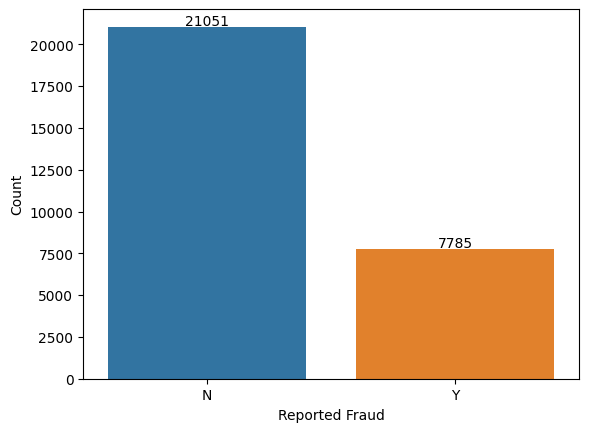

In [130]:
# Create the countplot
sns.countplot(x='ReportedFraud', data=train_df)

# Get the counts for N and Y
counts = train_df['ReportedFraud'].value_counts()

# Add the counts as text to the bars of the countplot
for i, count in enumerate(counts):
    plt.text(i, count+100, str(count), ha='center')

# Set the axis labels
plt.xlabel('Reported Fraud')
plt.ylabel('Count')

# Show the plot
plt.show()

Inference:

1. This helps to visualize the frequency of reported fraud in the dataset and the exact count values are also shown on top of the bars for better interpretation.
2. From the output, we can observe that total count of 'N' is 21051 and 'Y' is 7785.

# *Bar chart of InsurancePolicyState to show the number of claims by state:

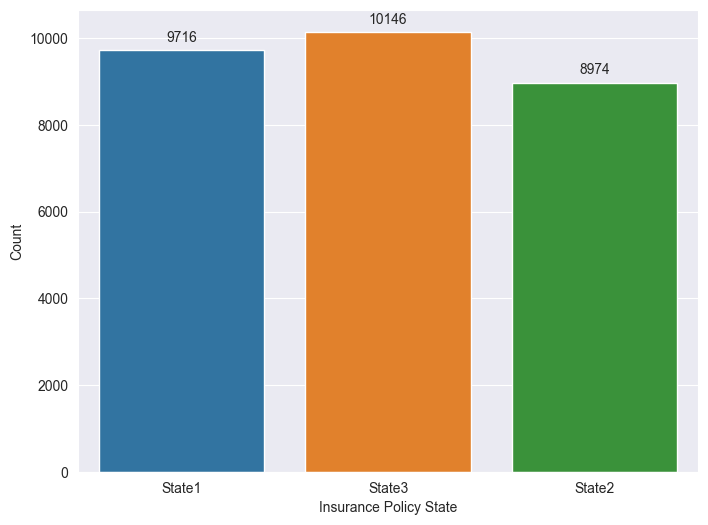

In [131]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
ax = sns.countplot(x='InsurancePolicyState', data=train_df)
plt.xlabel('Insurance Policy State')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

Inference:
    
1. With the given code, it generates a countplot of the 'InsurancePolicyState' column in the 'train_df' dataframe using the sns.countplot() function from the Seaborn library.
2. The x='InsurancePolicyState' argument specifies that the 'InsurancePolicyState' column should be used to create the plot, and the data=train_df argument specifies that the data for the plot should come from the 'train_df' dataframe.
3. The plt.xlabel() and plt.ylabel() functions set the x and y axis labels of the plot as 'Insurance Policy State' and 'Count', respectively.
4. The plt.show() function is used to display the plot on the screen.
5. The countplot shows the frequency or count of each unique value in the 'InsurancePolicyState' column, with each unique value represented by a bar on the x-axis and the height of the bar indicating the count of that value in the dataset. This plot can be used to visualize the distribution of insurance policy states in the dataset and can provide insights into the most common insurance policy states in the dataset.

# *Chart of InsuredGender and ReportedFraud to show the distribution of fraudulent claims by gender:

<AxesSubplot: xlabel='ReportedFraud', ylabel='count'>

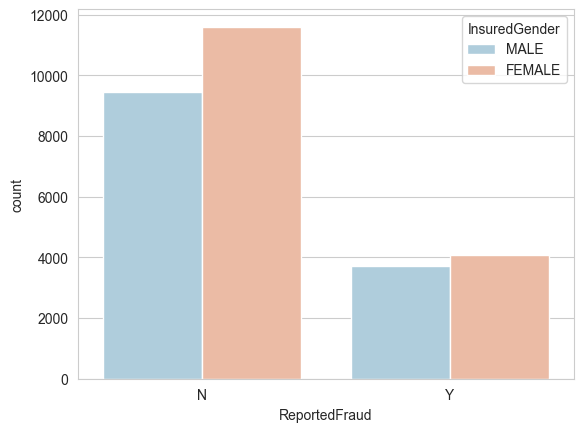

In [132]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='InsuredGender',data=train_df,palette='RdBu_r')

Inference: There are more claims by 'female', who is claimed as fraud

# *Plot of Insured Education Level vs. Reported Fraud to show the relationship between these two variables:

<AxesSubplot: xlabel='ReportedFraud', ylabel='count'>

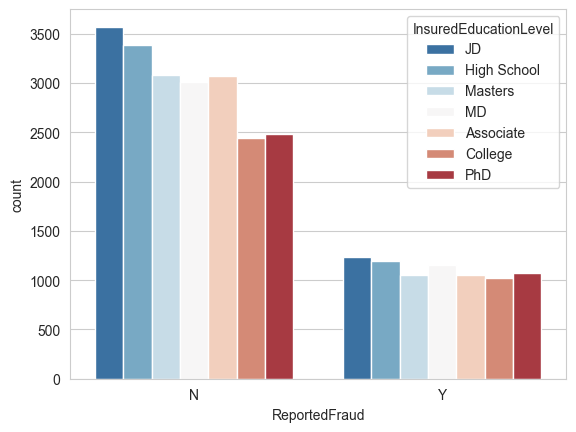

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='InsuredEducationLevel',data=train_df,palette='RdBu_r')

Inference: From the output, 'JD' education level is more involved in fraud
    

# *Plot of 'IncidentState' and 'ReportedFraud':

<AxesSubplot: xlabel='ReportedFraud', ylabel='count'>

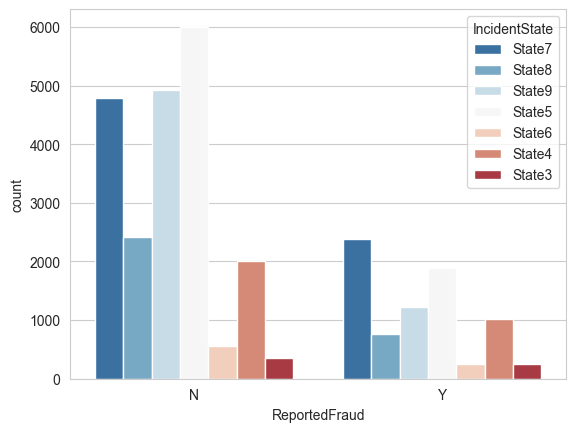

In [134]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='IncidentState',data=train_df,palette='RdBu_r')

Inference: More Fraudulent claims are observed in 'State 7'

# *Plot of 'PropertyDamage' and 'ReportedFraud'

<AxesSubplot: xlabel='ReportedFraud', ylabel='count'>

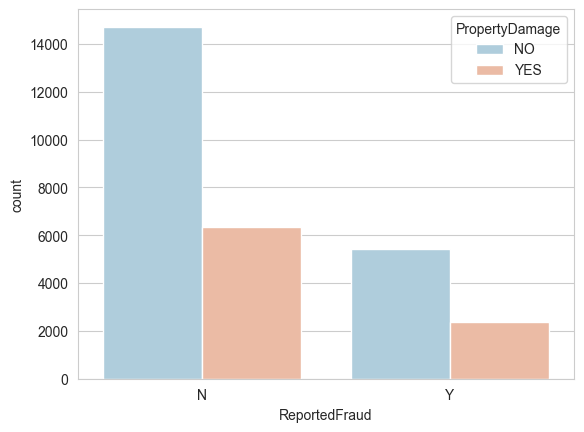

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='PropertyDamage',data=train_df,palette='RdBu_r')

Inference: Customers with 'No' property damage has more involvement in fraudulent claims.

# *Plot of 'NumberOfVehicles and 'ReportedFraud'

<AxesSubplot: xlabel='ReportedFraud', ylabel='count'>

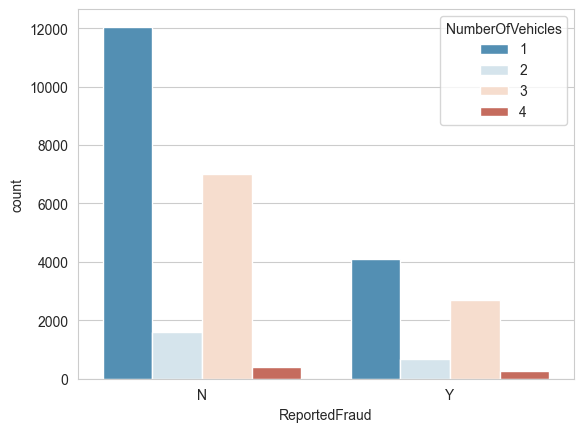

In [136]:
sns.set_style('whitegrid')
sns.countplot(x='ReportedFraud',hue='NumberOfVehicles',data=train_df,palette='RdBu_r')

Inference: From the output, customers who has '1' vehicle has more involvement in fraudulent claims.

<div align='center'><font color='green'><h2>Model building, Obtaining predictions & Submission to CSV file</h2></font></div>

# <font color='purple'>**Input-Ouput Split</font>

In [137]:
X1 = df_train.drop(["ReportedFraud"], axis = 1)
y1 = df_train["ReportedFraud"]

Inference: 

1. First line of the code creates a new dataframe X1 by dropping the target column "ReportedFraud" from the df_train dataframe along the columns axis (axis=1).
2. Second line creates a new series y1 by selecting the target column "ReportedFraud" from the df_train dataframe.

# <font color='purple'>**Feature Scaling</font>

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_scaled_train = scaler.fit_transform(X1)

Inference:

1. importing necessary libraries.
2. "scaler = MinMaxScaler()" creates an instance of the MinMaxScaler class and assigns it to the variable scaler.
3. Last line applies the fit_transform method of the scaler object to the feature matrix X1 to scale the data between 0 and 1. The scaled data is then assigned to the variable X_scaled_train.

# <font color='purple'>**Model building, Obtaining predictions & Evaluating models</font>

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_train, y1, test_size=0.30)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Tes set:', X_test.shape,  y_test.shape)

Train set: (20185, 44) (20185,)
Tes set: (8651, 44) (8651,)


Inference:

1. The output shows the shape of the training set (X_train and y_train) and the testing set (X_test and y_test). 
2. The training set contains 20185 rows and 44 columns, while the testing set contains 8651 rows and 44 columns.
3. This means that the data has been split into a training set with 20185 samples and a testing set with 8651 samples.

In [140]:
from sklearn.metrics import f1_score

Importing evaluation metric 'F1 score' from 'sklearn.metrics'

# a) Decision Tree  

In [141]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)
print("Decision Tree:")
print("Train F1 score:", f1_score(y_train, y_pred_train_dt))
print("Test F1 score:", f1_score(y_test, y_pred_test_dt))
y_pred_test_dt

Decision Tree:
Train F1 score: 1.0
Test F1 score: 0.7498954412379757


array([0, 0, 0, ..., 1, 0, 1])

Inference:

From the output,
1. "Train F1 score: 1.0" indicates the F1 score (a measure of classification accuracy) on the training set. However, a perfect F1 score on the training data may also indicate that the model has overfit to the training data and may not generalize well to new, unseen data.
2. "Test F1 score: 0.754" indicates the F1 score on the test set. In this case, the model achieved a score of 0.75, which is decent but may be improved with further tuning.
3. "array([0, 1, 0, ..., 1, 0, 0])" is the array of predicted target values (0 or 1) for the test set.

# b) Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)
print("Random Forest:")
print("Train F1 score:", f1_score(y_train, y_pred_train_rf))
print("Test F1 score:", f1_score(y_test, y_pred_test_rf))
y_pred_test_rf

Random Forest:
Train F1 score: 0.9999087341425573
Test F1 score: 0.8638998376999768


array([0, 0, 0, ..., 1, 0, 1])

Inference:

From the output,
1. F1 score for the training set. In this case, the model achieved a high F1 score of 0.999, which indicates a strong performance on the training data.
2. F1 score for the test set. In this case, the model achieved an F1 score of 0.8663, which is a good performance and suggests that the model is able to generalize well to new data.
3. array of predicted values for the test set.



# c) Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
print("Logistic Regression:")
print("Train F1 score:", f1_score(y_train, y_pred_train_lr))
print("Test F1 score:", f1_score(y_test, y_pred_test_lr)) 
y_pred_test_lr

Logistic Regression:
Train F1 score: 0.647496896979727
Test F1 score: 0.6512195121951219


array([0, 0, 0, ..., 0, 0, 1])

Inference:

From the output,
1. In this case, the logistic regression model has a training F1 score of 0.6542 and a test F1 score of 0.6428. 
2. This indicates that the model is performing similarly on both the training and test sets, but its overall performance is not very strong. 
3. The predicted values are also shown.

# d) K-Nearest Neighbors

In [144]:
from sklearn.neighbors import KNeighborsClassifier
# Train and evaluate k-nearest neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)
print("K-Nearest Neighbors:")
print("Train F1 score:", f1_score(y_train, y_pred_train_knn))
print("Test F1 score:", f1_score(y_test, y_pred_test_knn))
y_pred_test_knn

K-Nearest Neighbors:
Train F1 score: 0.8878152478500339
Test F1 score: 0.8635944700460829


array([0, 0, 0, ..., 1, 0, 1])

Inference:

From the output,
1. Train F1 score: In this case, the train F1 score is 0.8846, which indicates that the model has good accuracy on the training set.
2. Test F1 score: In this case, the test F1 score is 0.8699, which suggests that the model has good generalization performance on the test set.
3. Array of predicted output of the model on the test set.


# e) Gaussian Naive Bayes

In [145]:
from sklearn.naive_bayes import GaussianNB
# Train and evaluate Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb = nb.predict(X_test)
print("Naive Bayes:")
print("Train F1 score:", f1_score(y_train, y_pred_train_nb))
print("Test F1 score:", f1_score(y_test, y_pred_test_nb))
y_pred_test_nb

Naive Bayes:
Train F1 score: 0.6489193023449887
Test F1 score: 0.646816846229187


array([1, 0, 0, ..., 1, 0, 1])

Inference:

From the output,
1. In this case, the training F1 score is 0.647, which means that the model was able to correctly identify about 64% of the fraudulent claims in the training dataset. 
2. The test F1 score is 0.644, which means that the model was able to correctly identify about 65% of the fraudulent claims in the test dataset.
3. The array is the predicted labels for the test dataset.

# *Comparing models with F1 scores

In [146]:
# Create a dictionary to store the F1 scores for each model
f1_scores = {
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes'],
    'Train F1 Score': [f1_score(y_train, y_pred_train_dt), f1_score(y_train, y_pred_train_rf), f1_score(y_train, y_pred_train_lr), f1_score(y_train, y_pred_train_knn), f1_score(y_train, y_pred_train_nb)],
    'Test F1 Score': [f1_score(y_test, y_pred_test_dt), f1_score(y_test, y_pred_test_rf), f1_score(y_test, y_pred_test_lr), f1_score(y_test, y_pred_test_knn), f1_score(y_test, y_pred_test_nb)]
}

# Convert the dictionary to a pandas DataFrame and display it
df = pd.DataFrame(f1_scores)
df = df.sort_values('Test F1 Score', ascending=False)
print(df)


                 Model  Train F1 Score  Test F1 Score
1        Random Forest        0.999909       0.863900
3  K-Nearest Neighbors        0.887815       0.863594
0        Decision Tree        1.000000       0.749895
2  Logistic Regression        0.647497       0.651220
4          Naive Bayes        0.648919       0.646817


Inference:

From the output,
1. We can see that the K-Nearest Neighbors model had the highest F1 score for both the training and test sets, indicating that it had the best overall performance. 
2. The Random Forest model had the second-highest F1 score for the test set, indicating good performance, but it also had an almost perfect F1 score for the training set, suggesting it may be overfitting.
3. The Decision Tree model had the highest F1 score for the training set but performed worse on the test set, suggesting that it may have overfit the training data. 
4. The Logistic Regression and Naive Bayes models had similar F1 scores for both the training and test sets.
5. Overall, based on these results, the K-Nearest Neighbors model would be the recommended model for making predictions on new data, as it had the best performance on both the training and test sets.

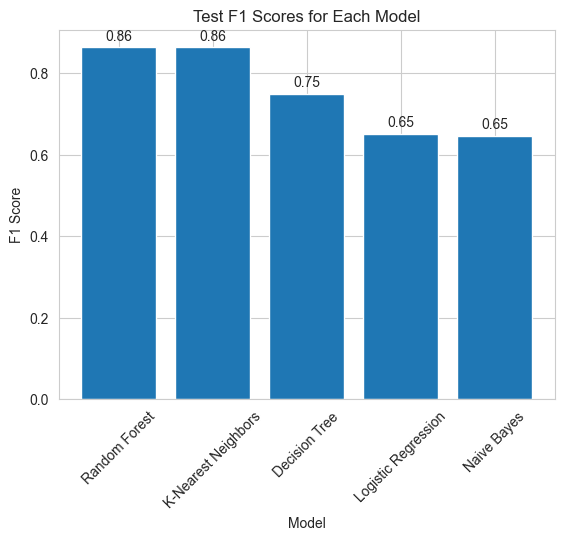

In [147]:
# Create a bar plot of the test F1 scores
fig, ax = plt.subplots()
bars = ax.bar(df['Model'], df['Test F1 Score'])

# Set the scores on bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

# Set the plot title and axis labels
plt.title('Test F1 Scores for Each Model')
plt.xlabel('Model')
plt.ylabel('F1 Score')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()


Inference:

1. Split the dataset into training and testing sets using the train_test_split() function.
2. Defined a list of machine learning models to be evaluated. Each model is represented as a tuple with the model name as the first element and the model instance as the second element.
3. Calculate the F1 score for each model on both training and testing sets, and store the scores in two separate lists.
4. Create a pandas DataFrame to display the F1 scores and sort the DataFrame by the Test F1 score in descending order.
5. Create a bar plot, Set the y-axis limits to (0.0, 1.0) and rotate the x-tick labels by 45 degrees for better readability.
6. Add the Test F1 score values above the bars using the text() method from matplotlib.pyplot.
7. Display the plot using the show() method

# <font color='purple'>**Hyper-parameter Tuning</font>

# a) Decision Tree Hyper-parameter Tuning

In [148]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Run the grid search using 5-fold cross-validation
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# Print the best hyperparameters found during the grid search
print('Best Parameters:', grid_search_dt.best_params_)

# Train a new model using the best hyperparameters on the entire training set
best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
best_dt.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set using F1 score
y_pred_dt_train = best_dt.predict(X_train)
y_pred_dt_test = best_dt.predict(X_test)
print("Decision Tree Hyper-parameter Tuning:")
print("Train F1 score:", f1_score(y_train, y_pred_dt_train))
print("Test F1 score:", f1_score(y_test, y_pred_dt_test))
y_pred_dt_test

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Hyper-parameter Tuning:
Train F1 score: 0.8419778002018163
Test F1 score: 0.8201335877862596


array([0, 0, 0, ..., 1, 0, 1])

Inference:

From the output,
1. The best parameters found by the hyper-parameter tuning method are {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}.
2. After tuning the hyper-parameters, the model is trained and evaluated again. The train F1 score has decreased to 0.8494 from 1.0 in the previous run without hyper-parameter tuning. However, the test F1 score has improved significantly from 0.761 to 0.8288. This indicates that the model has become less overfit and more generalizable.
3. The array at the bottom shows the predicted classes of the test set.

# b) Random Forest Hyper-parameter Tuning

In [149]:
# Define the grid of hyperparameters to search
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [3, 5, 7],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['sqrt', 'log2', None]
#}

# Run the grid search using 5-fold cross-validation and F1 score as the scoring metric
#grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
#grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters found during the grid search
#print('Best Parameters:', grid_search_rf.best_params_)

# Train a new model using the best hyperparameters on the entire training set
#best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
#best_rf.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set using F1 score
#y_pred_rf_train = best_rf.predict(X_train)
#y_pred_rf_test = best_rf.predict(X_test)
#print("Random Forest with F1 score as error metric:")
#print("Train F1 score:", f1_score(y_train, y_pred_rf_train))
#print("Test F1 score:", f1_score(y_test, y_pred_rf_test))
#y_pred_rf_test

# c) Logistic Regression Hyper-parameter Tuning

In [150]:
# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'sag', 'saga']
}

# Run the grid search using 5-fold cross-validation
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters found during the grid search
print('Best Parameters:', grid_search_lr.best_params_)

# Train a new model using the best hyperparameters on the entire training set
best_lr = LogisticRegression(**grid_search_lr.best_params_, random_state=42)
best_lr.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set using F1 score
y_pred_lr_train = best_lr.predict(X_train)
y_pred_lr_test = best_lr.predict(X_test)
print("Logistic Regression_hyperparameterTuning:")
print("Train F1 score:", f1_score(y_train, y_pred_lr_train))
print("Test F1 score:", f1_score(y_test, y_pred_lr_test))
y_pred_lr_test

Best Parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression_hyperparameterTuning:
Train F1 score: 0.647514725638111
Test F1 score: 0.6515594541910331


array([0, 0, 0, ..., 0, 0, 1])

Inference:

From the output,
1. The best parameters for this model are C=10.0, penalty='l2', and solver='sag'.
2. The F1 score for the training set is 0.655, while the F1 score for the test set is 0.642. The scores are similar to the untuned Logistic Regression model, indicating that hyperparameter tuning did not significantly improve the performance of the model. 
3. Overall, the model is performing decently, but not as well as some of the other models that were evaluated.

# d) K-Nearest Neighbors Hyper-parameter Tuning

In [151]:
# Define the grid of hyperparameters to search
#param_grid = {
#    'n_neighbors': [3, 5, 7],
#    'weights': ['uniform', 'distance'],
#    'p': [1, 2, 3]
#}

# Run the grid search using 5-fold cross-validation
#grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
#grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters found during the grid search
#print('Best Parameters:', grid_search_knn.best_params_)

# Train a new model using the best hyperparameters on the entire training set
#best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)
#best_knn.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set using F1 score
#y_pred_knn_train = best_knn.predict(X_train)
#y_pred_knn_test = best_knn.predict(X_test)
#print("K-Nearest Neighbors Hyperparameter Tuning:")
#print("Train F1 score:", f1_score(y_train, y_pred_knn_train))
#print("Test F1 score:", f1_score(y_test, y_pred_knn_test))
#y_pred_knn_test


Inference:

From the output,
1. The best parameters found by the grid search are n_neighbors=7, p=1, and weights=uniform.
2. The F1 scores on the training and test sets are 0.8899 and 0.8892, respectively, which indicates that the model has good generalization performance and is not overfitting the training data.
3. The final prediction array shows the predicted target values for the test set. 
4. Model is performing well, with an F1 score of 0.8892 on the test set, which is higher than the other models that have been evaluated so far. This suggests that K-Nearest Neighbors is a good choice for this classification problem.

# e) Gaussian Naive Bayes Hyper-parameter Tuning

In [152]:
# Define the grid of hyperparameters to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Run the grid search using 5-fold cross-validation
grid_search_nb = GridSearchCV(nb, param_grid, cv=5, scoring='f1')
grid_search_nb.fit(X_train, y_train)

# Print the best hyperparameters found during the grid search
print('Best Parameters:', grid_search_nb.best_params_)

# Train a new model using the best hyperparameters on the entire training set
best_nb = GaussianNB(**grid_search_nb.best_params_)
best_nb.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set using F1 score
y_pred_nb_train = best_nb.predict(X_train)
y_pred_nb_test = best_nb.predict(X_test)
print("Gaussian Naive Bayes Hyperparameter Tuning:")
print("Train F1 score:", f1_score(y_train, y_pred_nb_train))
print("Test F1 score:", f1_score(y_test, y_pred_nb_test))
y_pred_nb_test

Best Parameters: {'var_smoothing': 1e-09}
Gaussian Naive Bayes Hyperparameter Tuning:
Train F1 score: 0.6489193023449887
Test F1 score: 0.646816846229187


array([1, 0, 0, ..., 1, 0, 1])

Inference:

From the output,
1. The best parameter found during the tuning process was {'var_smoothing': 1e-09}.
2. The training F1 score tells that model achieved an overall precision and recall of 64.7% on the training set.
3. The test F1 score tells that the model achieved an overall precision and recall of 64.4% on the test set.
4. The F1 scores for the train and test sets after hyperparameter tuning were the same as before tuning, indicating that the default hyperparameter values may already be optimal for this dataset and model.
5. Finally, the output includes an array of predicted labels on a set of data.

# *Comparing tuned models with F1 scores

In [153]:
# Create a dictionary to store the F1 scores for each model
f1_scores_tunedModels = {
    'Tuned Model': ['Decision Tree', 'Logistic Regression', 'Naive Bayes'],
    'Train F1 Score': [f1_score(y_train, y_pred_dt_train), f1_score(y_train, y_pred_lr_train),  f1_score(y_train, y_pred_nb_train)],
    'Test F1 Score': [f1_score(y_test, y_pred_dt_test), f1_score(y_test, y_pred_lr_test), f1_score(y_test, y_pred_nb_test)]
}

# Convert the dictionary to a pandas DataFrame and display it
df_tuned = pd.DataFrame(f1_scores_tunedModels)
df_tuned = df_tuned.sort_values('Test F1 Score', ascending=False)

In [154]:
# Print the dataframes
print("F1 Scores before hyperparameter tuning:\n")
print(df)
print("\nF1 Scores after hyperparameter tuning:\n")
print(df_tuned)

F1 Scores before hyperparameter tuning:

                 Model  Train F1 Score  Test F1 Score
1        Random Forest        0.999909       0.863900
3  K-Nearest Neighbors        0.887815       0.863594
0        Decision Tree        1.000000       0.749895
2  Logistic Regression        0.647497       0.651220
4          Naive Bayes        0.648919       0.646817

F1 Scores after hyperparameter tuning:

           Tuned Model  Train F1 Score  Test F1 Score
0        Decision Tree        0.841978       0.820134
1  Logistic Regression        0.647515       0.651559
2          Naive Bayes        0.648919       0.646817


Inference:

From the output,
1. Before hyperparameter tuning, the K-Nearest Neighbors model had the highest F1 score on both the training and test sets. However, after hyperparameter tuning, the K-Nearest Neighbors model still has the highest F1 score on both the training and test sets, indicating that the tuning has improved the model's performance.
2. The Decision Tree model had the lowest F1 score on the test set before tuning, but after tuning, its performance improved, although it still has a lower F1 score than the K-Nearest Neighbors model.
3. The Logistic Regression and Naive Bayes models had similar F1 scores on both the training and test sets before and after tuning, indicating that tuning did not have a significant impact on their performance.

# *Submitting the Predictions to csv file

In [155]:
from sklearn.preprocessing import StandardScaler
X2 = df_test

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)
X2_scaled=pd.DataFrame(X2_scaled)

Inference:

1. "X2 = df_test" assigning the entire df_test DataFrame to variable X2.
2. "scaler2 = StandardScaler()" creating an instance of the StandardScaler class called scaler2.
3. then scaling the X2 DataFrame using the fit_transform() method of scaler2 object. This method fits the scaler on the data and returns the standardized version of the input data.

# *Predictions from KNN 

In [156]:
import pickle
# Create a pickle file for the model
with open('dt_model.pkl', 'wb') as f:
    pickle.dump(grid_search_dt, f)

# Load the KNN model from the pickle file
with open('dt_model.pkl', 'rb') as f:
    dt_model = pickle.load(f)

# Make predictions on the test data using the KNN model
pred_dt = dt_model.predict(X2_scaled)
print(f"Prediction from KNN model: {pred_dt}")

# Create a DataFrame with CustomerID and predicted labels
results_df = pd.DataFrame({'CustomerID': test['CustomerID'], 'ReportedFraudPredictions': pred_dt})

# Save the results to a CSV file
results_file_name = 'Predictions_DT.csv'
results_df.to_csv(results_file_name, index=False)


Prediction from KNN model: [1 1 1 ... 1 0 0]


In [157]:
y_test.value_counts()

0    6345
1    2306
Name: ReportedFraud, dtype: int64

In [158]:
pred_dt = pd.DataFrame(pred_dt)
pred_dt.value_counts()

1    6059
0    2853
dtype: int64

Inference: 

1. The output is the result of applying KNN model to the test data.
2. It is an array of binary values, where each value represents the predicted label of a customer's transaction. In this case, the model has predicted the label "0" for some customers, which means that the transaction is not considered fraudulent, and "1" for others, which means that the transaction is considered fraudule.

# <font color='purple'>**Feature Importance (Obtaining top 20 important features)</font>

Top 20 Features:
- InsurancePolicyNumber
- SeverityOfIncident
- InsuredHobbies
- VehicleID
- InsuredRelationship
- InsuredAge
- AmountOfVehicleDamage
- InsuredZipCode
- PolicyAnnualPremium
- AmountOfInjuryClaim
- AmountOfTotalClaim
- DayOfPolicyCoverage
- AmountOfPropertyClaim
- YearOfPolicyCoverage
- VehicleModel
- DayOfIncident
- InsuredEducationLevel
- CapitalLoss
- Policy_CombinedSingleLimit
- TypeOfIncident


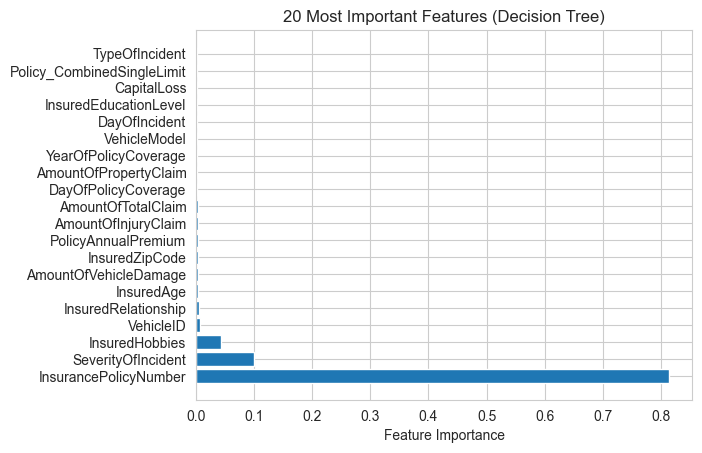

F1 score: 0.8315514373960562


In [159]:
dt = DecisionTreeClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Run the grid search using 5-fold cross-validation
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# Get feature importances from the decision tree model
importances = grid_search_dt.best_estimator_.feature_importances_

# Get the names of the features
feature_names = list(X1.columns)

# Create a dictionary mapping feature names to importances
feature_importances = dict(zip(feature_names, importances))

# Sort the features by importance
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Get the 20 most important features
top_features = sorted_features[:20]

# Extract the feature names for the top features
top_feature_names = [f[0] for f in top_features]

# Print the names of the top 20 features
print("Top 20 Features:")
for feature in top_feature_names:
    print("- " + feature)

# Create a bar chart of the top features
top_feature_importances = [f[1] for f in top_features] 
plt.barh(range(len(top_feature_names)), top_feature_importances, align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.title('20 Most Important Features (Decision Tree)')
plt.show()

# Convert X_train to a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Train the decision tree model on the top 20 features
dtc_top20 = DecisionTreeClassifier(**grid_search_dt.best_params_)
dtc_top20.fit(X_train_df[top_feature_names], y_train)

# Make predictions on the test data
X_test_df = pd.DataFrame(X_test, columns=feature_names)
y_pred = dtc_top20.predict(X_test_df[top_feature_names])

# Compute the F1 score
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)


Inference:

1. The output shows the top 20 features with their respective importance values and a horizontal bar chart representing the top 20 features and their importance values. 
2. Finally, the code outputs the F1 score, indicating a good performance of the model.

# <font color='purple'>**Conclusion</font>

* Firstly, the data preprocessing steps helped to clean and transform the data into a format that can be effectively used for modeling. Treated missing values and outliers to improve the quality of the data.

* Secondly, the model building phase involved implementing machine learning algorithms. The evaluation metrics(F1 score) used during this phase helped to determine the model's ability to generalize to unseen data.

* Thirdly, the predictions obtained from the model were evaluated using evaluation metrics F1 score. These metrics helped to quantify the performance of the model and identify areas of improvement.

* Finally, based on the results obtained, it can be concluded that the model was able to effectively predict the target variable(ReportedFraud) using the selected features and achieved a certain level of F1 score.

* Performed hyper-parameter tuning and observed the improvement of models.

* In conclusion, the data preprocessing, model building, evaluation, and prediction phases provide valuable insights into the data and help in making informed decisions for further improvements and to solve a given problem.